# Import Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract Dataset manualy from 
## https://www.sec.gov/search-filings/cik-lookup

In [2]:
df = pd.read_csv("Report.csv",sep=";")
df

,Company,Year,Total Revenue (in millions),Net Income (in millions),Total Assets (in millions),Total Liabilities (in millions),Cash Flow from Operating Activities (in millions)
0,Microsoft,2023,211915,72361,411978,205753,87582
1,Microsoft,2022,198270,72738,364840,198298,89035
2,Microsoft,2021,168088,61271,333779,191791,76740
3,Tesla,2023,96773,14974,106618,43009,13526
4,Tesla,2022,81462,12556,82338,36440,14724
5,Tesla,2021,53823,5519,62131,30548,11497
6,Apple,2023,383285,96995,352583,290437,110543
7,Apple,2022,394328,99803,352755,302083,122151
8,Apple,2021,365817,94680,351002,287912,104038


# Calculate year-over-year changes

## Change data order to ascending by date

In [3]:
df = df.groupby(['Company']).apply(lambda x: x.sort_values('Year', ascending=True)).reset_index(drop=True)
df

C:\Users\naba\AppData\Local\Temp\ipykernel_3268\857521637.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(['Company']).apply(lambda x: x.sort_values('Year', ascending=True)).reset_index(drop=True)


,Company,Year,Total Revenue (in millions),Net Income (in millions),Total Assets (in millions),Total Liabilities (in millions),Cash Flow from Operating Activities (in millions)
0,Apple,2021,365817,94680,351002,287912,104038
1,Apple,2022,394328,99803,352755,302083,122151
2,Apple,2023,383285,96995,352583,290437,110543
3,Microsoft,2021,168088,61271,333779,191791,76740
4,Microsoft,2022,198270,72738,364840,198298,89035
5,Microsoft,2023,211915,72361,411978,205753,87582
6,Tesla,2021,53823,5519,62131,30548,11497
7,Tesla,2022,81462,12556,82338,36440,14724
8,Tesla,2023,96773,14974,106618,43009,13526


In [4]:
df['Revenue Growth (%)'] = df.groupby(['Company'])['Total Revenue (in millions)'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby(['Company'])['Net Income (in millions)'].pct_change() * 100

In [5]:
df

,Company,Year,Total Revenue (in millions),Net Income (in millions),Total Assets (in millions),Total Liabilities (in millions),Cash Flow from Operating Activities (in millions),Revenue Growth (%),Net Income Growth (%)
0,Apple,2021,365817,94680,351002,287912,104038,NaN,NaN
1,Apple,2022,394328,99803,352755,302083,122151,7.793788,5.410858
2,Apple,2023,383285,96995,352583,290437,110543,-2.800461,-2.813543
3,Microsoft,2021,168088,61271,333779,191791,76740,NaN,NaN
4,Microsoft,2022,198270,72738,364840,198298,89035,17.956071,18.715216
5,Microsoft,2023,211915,72361,411978,205753,87582,6.882030,-0.518299
6,Tesla,2021,53823,5519,62131,30548,11497,NaN,NaN
7,Tesla,2022,81462,12556,82338,36440,14724,51.351653,127.504983
8,Tesla,2023,96773,14974,106618,43009,13526,18.795267,19.257725


# Imputing NaN value with 0

In [6]:
df.fillna(0, inplace=True)
df

,Company,Year,Total Revenue (in millions),Net Income (in millions),Total Assets (in millions),Total Liabilities (in millions),Cash Flow from Operating Activities (in millions),Revenue Growth (%),Net Income Growth (%)
0,Apple,2021,365817,94680,351002,287912,104038,0.000000,0.000000
1,Apple,2022,394328,99803,352755,302083,122151,7.793788,5.410858
2,Apple,2023,383285,96995,352583,290437,110543,-2.800461,-2.813543
3,Microsoft,2021,168088,61271,333779,191791,76740,0.000000,0.000000
4,Microsoft,2022,198270,72738,364840,198298,89035,17.956071,18.715216
5,Microsoft,2023,211915,72361,411978,205753,87582,6.882030,-0.518299
6,Tesla,2021,53823,5519,62131,30548,11497,0.000000,0.000000
7,Tesla,2022,81462,12556,82338,36440,14724,51.351653,127.504983
8,Tesla,2023,96773,14974,106618,43009,13526,18.795267,19.257725


# Calculating Year-by-Year growth rates for Total Assets, Total Liabilities and Cash flow from Operations Activities

In [7]:
df['Assets Growth (%)'] = df.groupby('Company')['Total Assets (in millions)'].pct_change() * 100
df['Liabilities Growth (%)'] = df.groupby('Company')['Total Liabilities (in millions)'].pct_change() * 100
df['Cash Flow from Operations Growth(%)'] = df.groupby('Company')['Cash Flow from Operating Activities (in millions)'].pct_change() * 100

In [8]:
df.fillna(0, inplace=True)

In [9]:
df

,Company,Year,Total Revenue (in millions),Net Income (in millions),Total Assets (in millions),Total Liabilities (in millions),Cash Flow from Operating Activities (in millions),Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow from Operations Growth(%)
0,Apple,2021,365817,94680,351002,287912,104038,0.000000,0.000000,0.000000,0.000000,0.000000
1,Apple,2022,394328,99803,352755,302083,122151,7.793788,5.410858,0.499427,4.921990,17.409985
2,Apple,2023,383285,96995,352583,290437,110543,-2.800461,-2.813543,-0.048759,-3.855232,-9.502992
3,Microsoft,2021,168088,61271,333779,191791,76740,0.000000,0.000000,0.000000,0.000000,0.000000
4,Microsoft,2022,198270,72738,364840,198298,89035,17.956071,18.715216,9.305858,3.392756,16.021631
5,Microsoft,2023,211915,72361,411978,205753,87582,6.882030,-0.518299,12.920184,3.759493,-1.631942
6,Tesla,2021,53823,5519,62131,30548,11497,0.000000,0.000000,0.000000,0.000000,0.000000
7,Tesla,2022,81462,12556,82338,36440,14724,51.351653,127.504983,32.523217,19.287678,28.068192
8,Tesla,2023,96773,14974,106618,43009,13526,18.795267,19.257725,29.488207,18.026894,-8.136376


# Data Exploration

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 12 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Company                                            9 non-null      object 
 1   Year                                               9 non-null      int64  
 2   Total Revenue (in millions)                        9 non-null      int64  
 3   Net Income (in millions)                           9 non-null      int64  
 4   Total Assets (in millions)                         9 non-null      int64  
 5   Total Liabilities (in millions)                    9 non-null      int64  
 6   Cash Flow from Operating Activities (in millions)  9 non-null      int64  
 7   Revenue Growth (%)                                 9 non-null      float64
 8   Net Income Growth (%)                              9 non-null      float64
 9   Assets Growth 

In [11]:
df.describe()

,Year,Total Revenue (in millions),Net Income (in millions),Total Assets (in millions),Total Liabilities (in millions),Cash Flow from Operating Activities (in millions),Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow from Operations Growth(%)
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2022.000000,217084.555556,58988.555556,268669.333333,176252.333333,69981.777778,11.108705,18.617438,9.409793,5.059287,4.692055
std,0.866025,133913.789489,38258.207672,140780.899853,112621.131472,44590.188825,17.022018,41.678263,13.153888,8.149765,12.789917
min,2021.000000,53823.000000,5519.000000,62131.000000,30548.000000,11497.000000,-2.800461,-2.813543,-0.048759,-3.855232,-9.502992
25%,2021.000000,96773.000000,14974.000000,106618.000000,43009.000000,14724.000000,0.000000,0.000000,0.000000,0.000000,-1.631942
50%,2022.000000,198270.000000,72361.000000,351002.000000,198298.000000,87582.000000,6.882030,0.000000,0.499427,3.392756,0.000000
75%,2023.000000,365817.000000,94680.000000,352755.000000,287912.000000,104038.000000,17.956071,18.715216,12.920184,4.921990,16.021631
max,2023.000000,394328.000000,99803.000000,411978.000000,302083.000000,122151.000000,51.351653,127.504983,32.523217,19.287678,28.068192


## Revenue

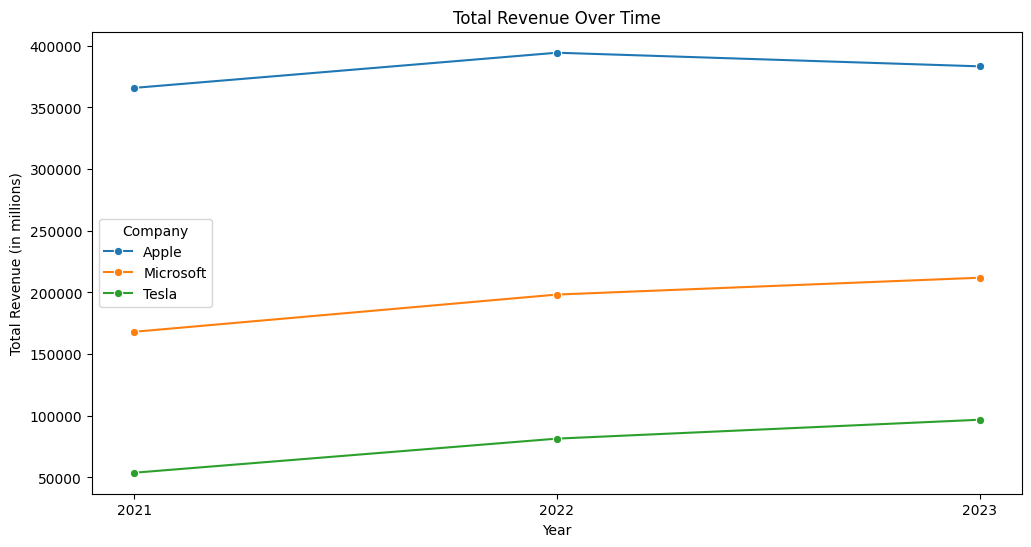

In [12]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Year', y='Total Revenue (in millions)', hue='Company', marker='o')
plt.title("Total Revenue Over Time")
plt.xlabel('Year')
plt.ylabel('Total Revenue (in millions)')
plt.xticks(ticks=range(df['Year'].min(), df['Year'].max() + 1))
plt.show()

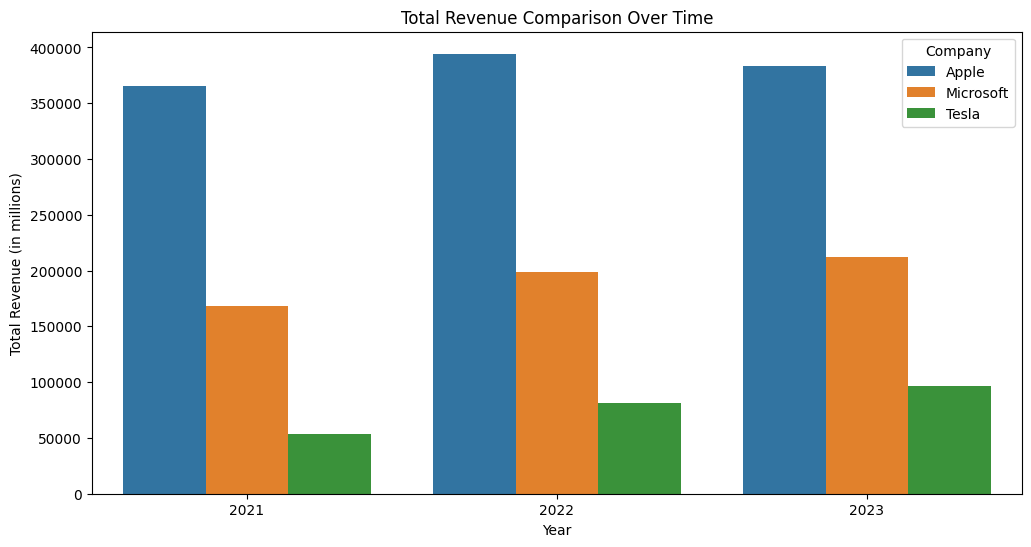

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Year', y='Total Revenue (in millions)', hue='Company')
plt.title("Total Revenue Comparison Over Time")
plt.xlabel('Year')
plt.ylabel('Total Revenue (in millions)')
plt.show()

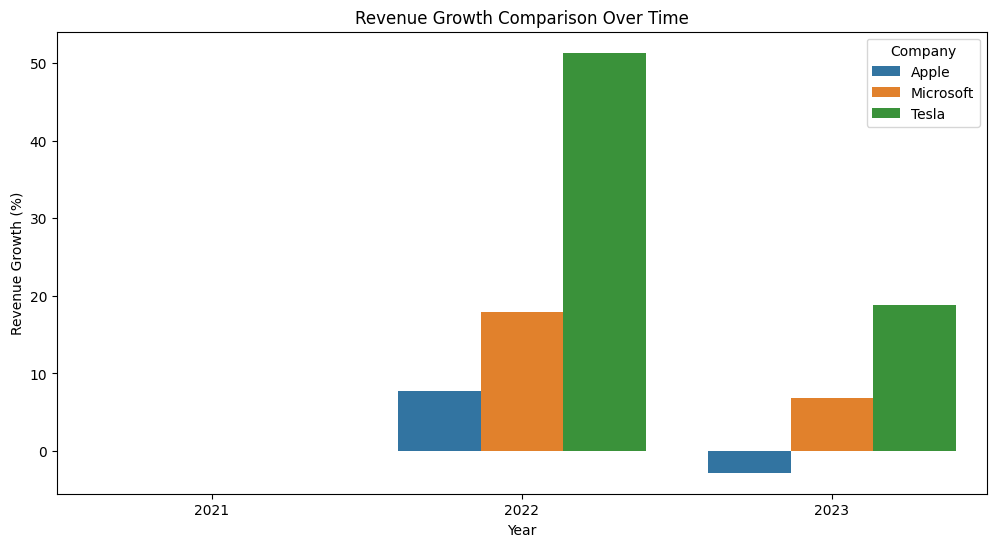

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Year', y='Revenue Growth (%)', hue='Company')
plt.title("Revenue Growth Comparison Over Time")
plt.xlabel('Year')
plt.ylabel('Revenue Growth (%)')
plt.show()

## Net Income

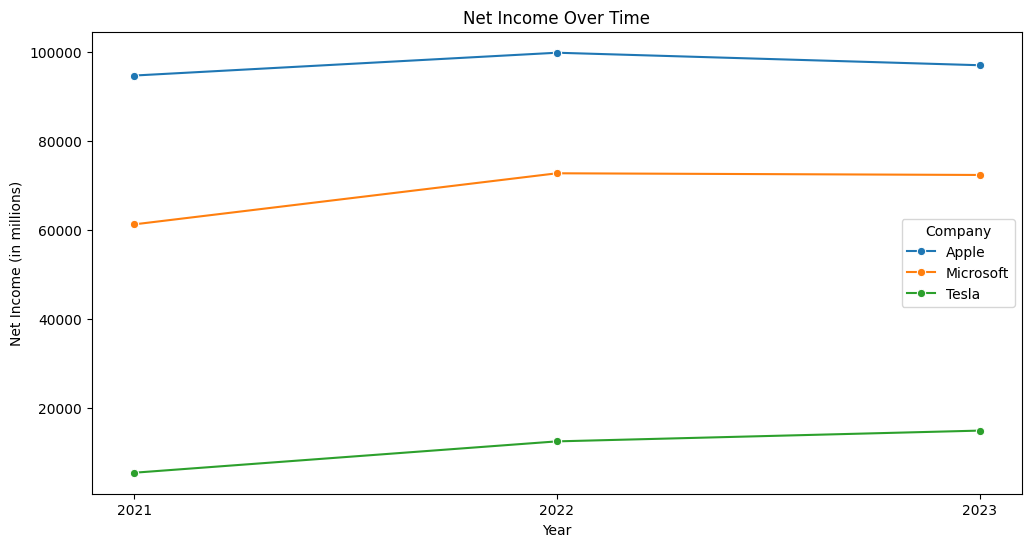

In [15]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Year', y='Net Income (in millions)', hue='Company', marker='o')
plt.title("Net Income Over Time")
plt.xlabel('Year')
plt.ylabel('Net Income (in millions)')
plt.xticks(ticks=range(df['Year'].min(), df['Year'].max() + 1))
plt.show()

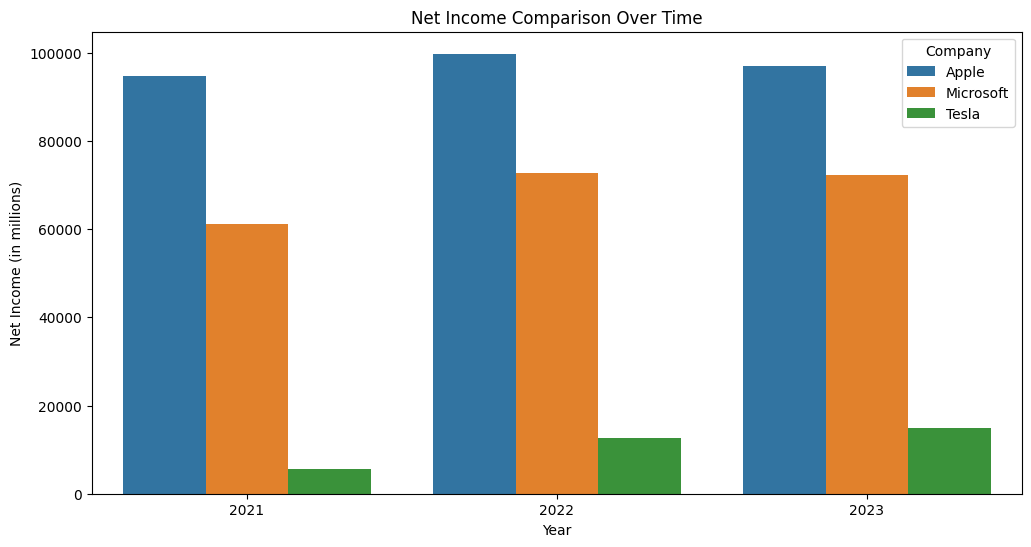

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Year', y='Net Income (in millions)', hue='Company')
plt.title("Net Income Comparison Over Time")
plt.xlabel('Year')
plt.ylabel('Net Income (in millions)')
plt.show()

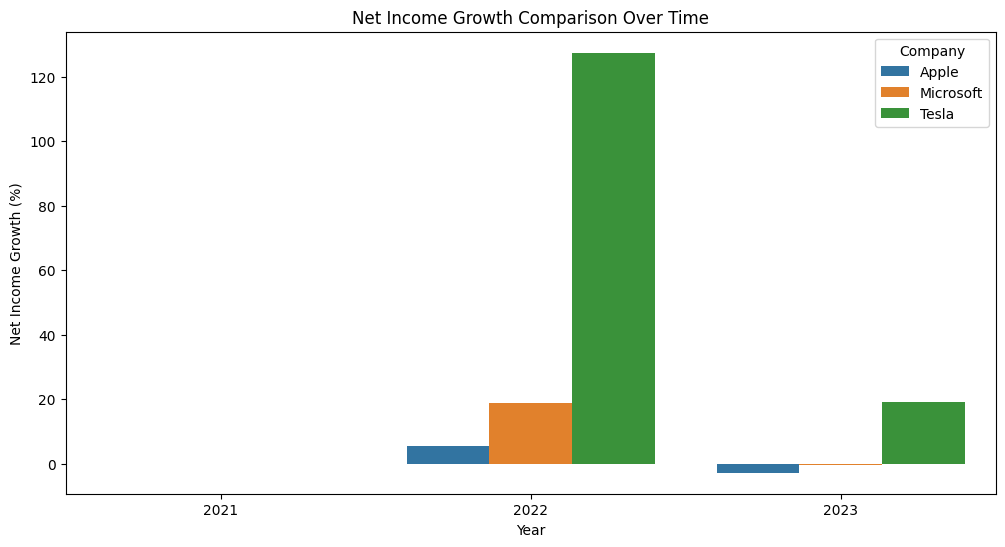

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Year', y='Net Income Growth (%)', hue='Company')
plt.title("Net Income Growth Comparison Over Time")
plt.xlabel('Year')
plt.ylabel('Net Income Growth (%)')
plt.show()

## Total Assets

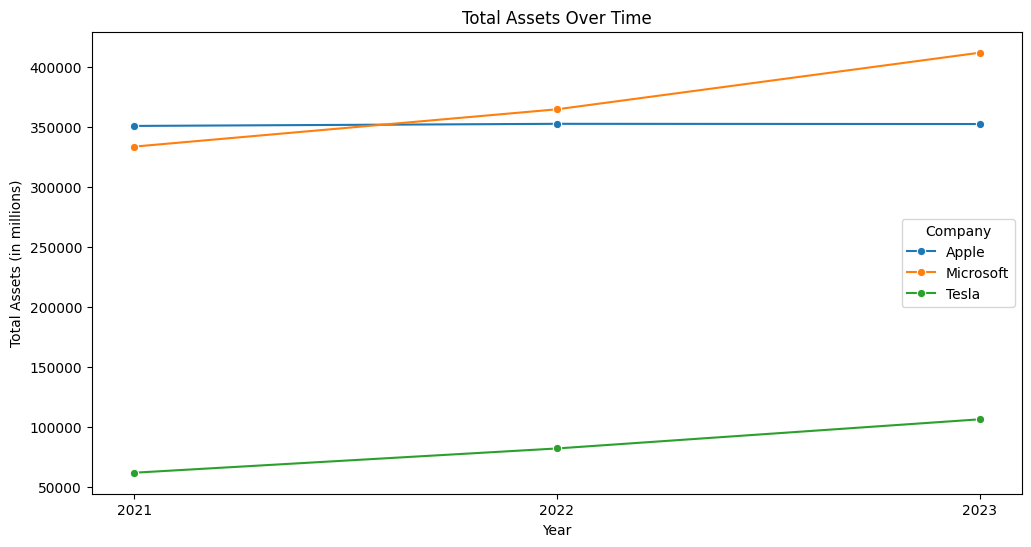

In [18]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Year', y='Total Assets (in millions)', hue='Company', marker='o')
plt.title("Total Assets Over Time")
plt.xlabel('Year')
plt.ylabel('Total Assets (in millions)')
plt.xticks(ticks=range(df['Year'].min(), df['Year'].max() + 1))
plt.show()

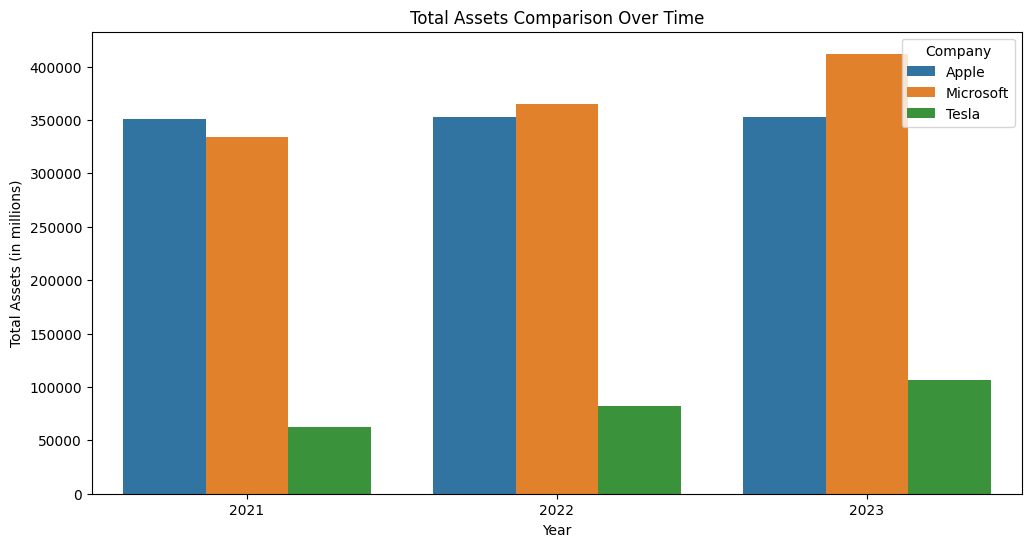

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Year', y='Total Assets (in millions)', hue='Company')
plt.title("Total Assets Comparison Over Time")
plt.xlabel('Year')
plt.ylabel('Total Assets (in millions)')
plt.show()

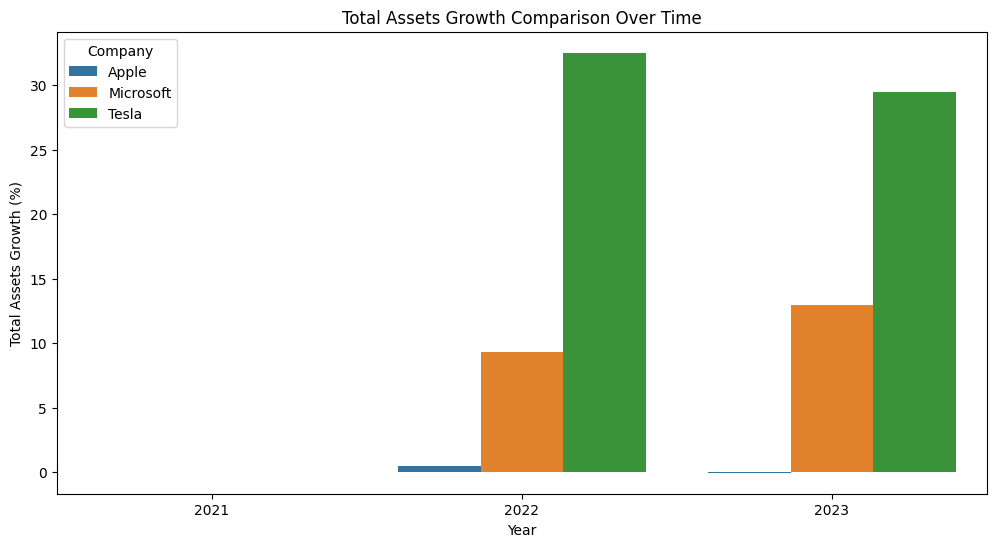

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Year', y='Assets Growth (%)', hue='Company')
plt.title("Total Assets Growth Comparison Over Time")
plt.xlabel('Year')
plt.ylabel('Total Assets Growth (%)')
plt.show()

## Total Liabilities

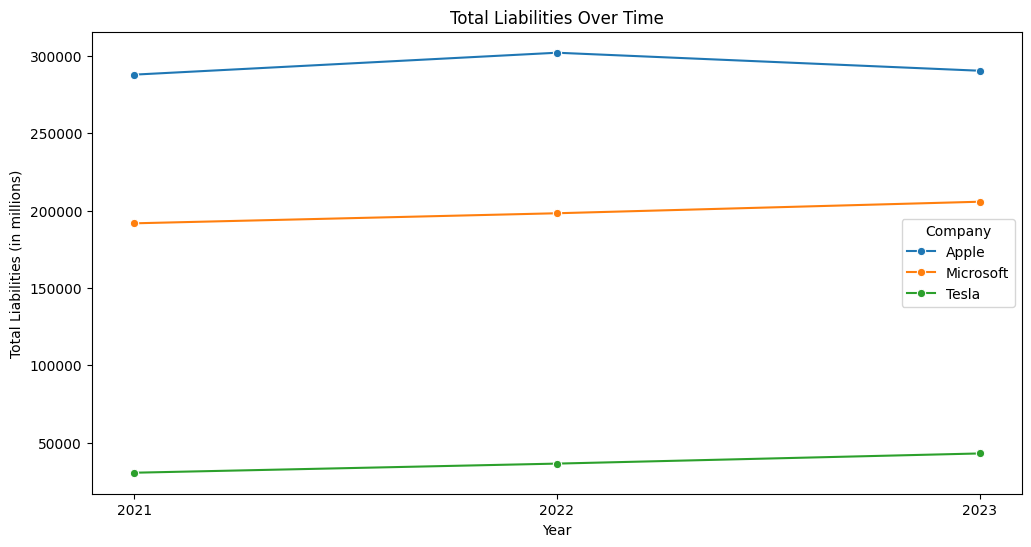

In [21]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Year', y='Total Liabilities (in millions)', hue='Company', marker='o')
plt.title("Total Liabilities Over Time")
plt.xlabel('Year')
plt.ylabel('Total Liabilities (in millions)')
plt.xticks(ticks=range(df['Year'].min(), df['Year'].max() + 1))
plt.show()

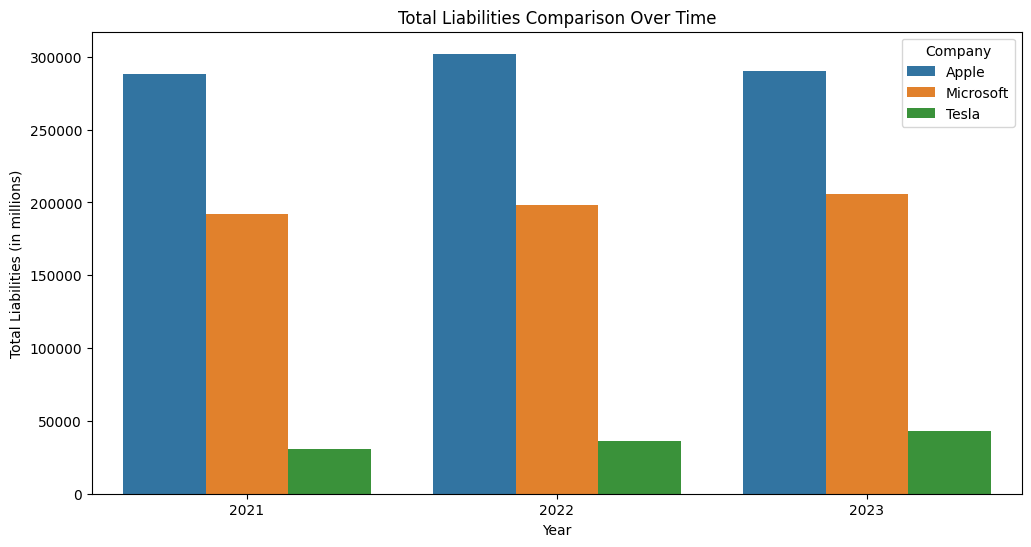

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Year', y='Total Liabilities (in millions)', hue='Company')
plt.title("Total Liabilities Comparison Over Time")
plt.xlabel('Year')
plt.ylabel('Total Liabilities (in millions)')
plt.show()

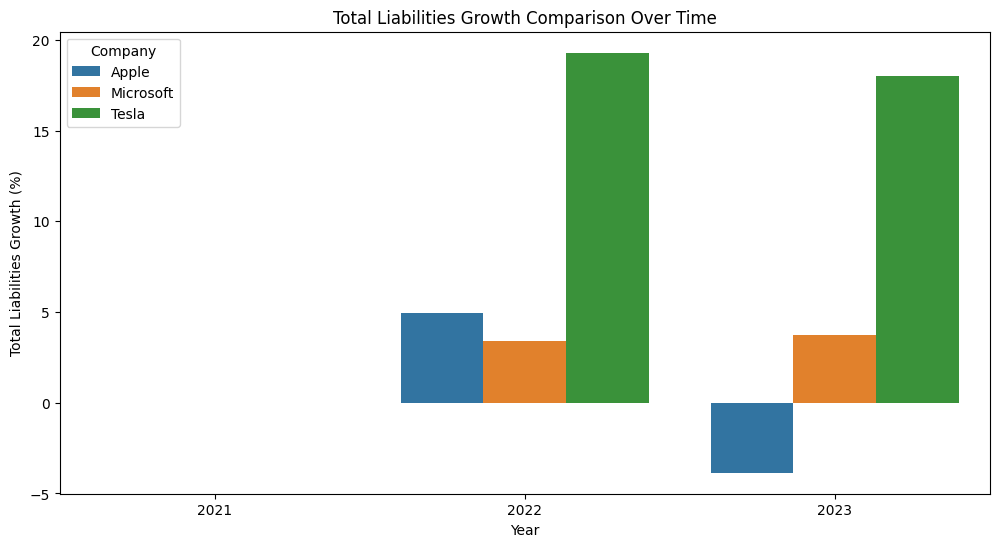

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Year', y='Liabilities Growth (%)', hue='Company')
plt.title("Total Liabilities Growth Comparison Over Time")
plt.xlabel('Year')
plt.ylabel('Total Liabilities Growth (%)')
plt.show()

## Cash Flow from Operating Activities

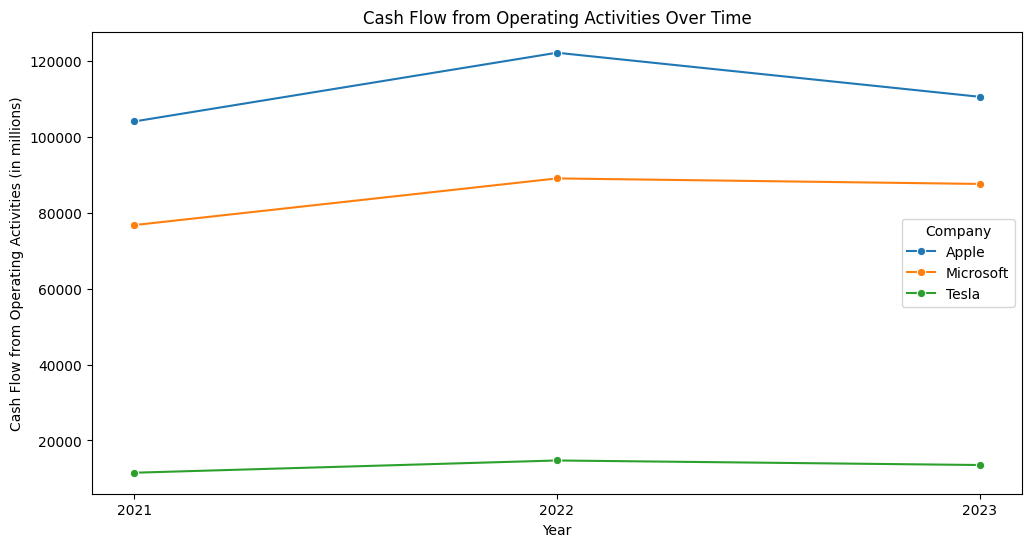

In [24]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Year', y='Cash Flow from Operating Activities (in millions)', hue='Company', marker='o')
plt.title("Cash Flow from Operating Activities Over Time")
plt.xlabel('Year')
plt.ylabel('Cash Flow from Operating Activities (in millions)')
plt.xticks(ticks=range(df['Year'].min(), df['Year'].max() + 1))
plt.show()

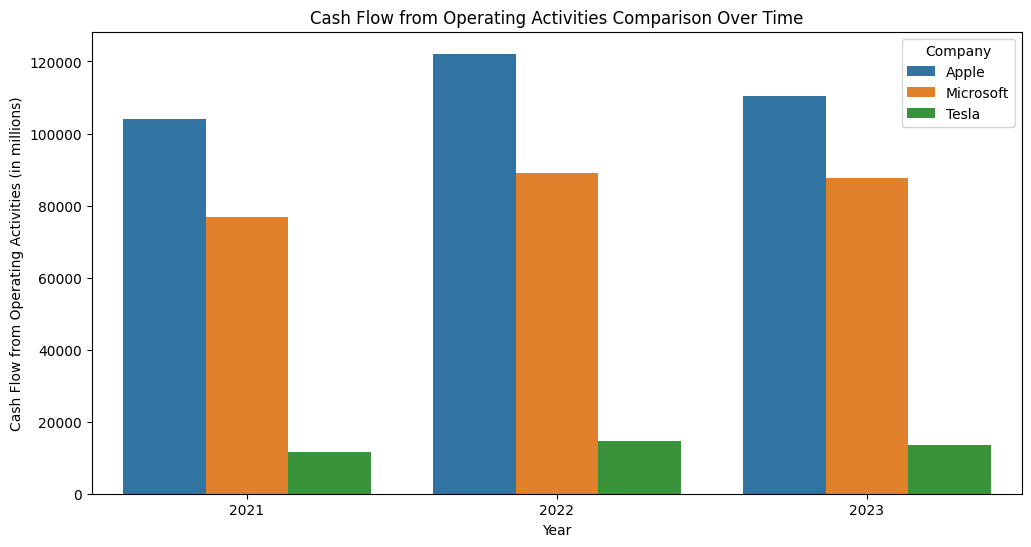

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Year', y='Cash Flow from Operating Activities (in millions)', hue='Company')
plt.title("Cash Flow from Operating Activities Comparison Over Time")
plt.xlabel('Year')
plt.ylabel('Cash Flow from Operating Activities (in millions)')
plt.show()

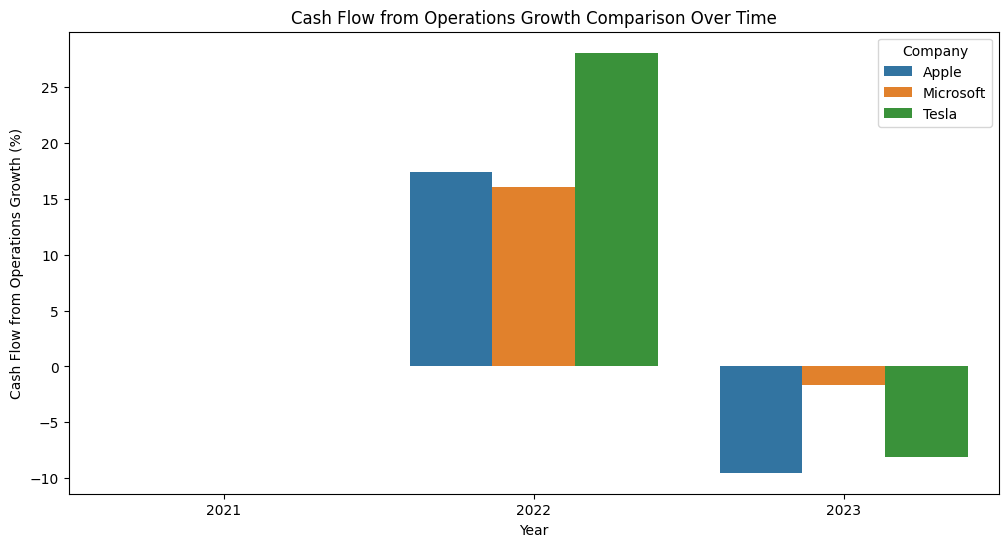

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Year', y='Cash Flow from Operations Growth(%)', hue='Company')
plt.title("Cash Flow from Operations Growth Comparison Over Time")
plt.xlabel('Year')
plt.ylabel('Cash Flow from Operations Growth (%)')
plt.show()

## Total Assets by the end of year 2023

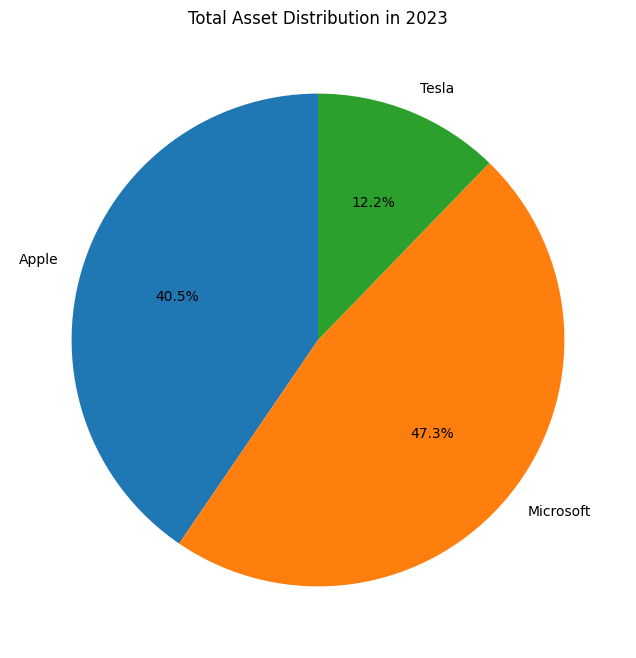

In [27]:
last_year = df['Year'].max()
last_data = df[df['Year'] == last_year]

last_assets = last_data.groupby('Company')['Total Assets (in millions)'].sum()

plt.figure(figsize=(8,8))
plt.pie(last_assets, labels=last_assets.index, autopct='%1.1f%%', startangle=90)
plt.title(f"Total Asset Distribution in {last_year}")
plt.show()


In [28]:
df.to_csv('Final_Data.csv',index=False)

# Conclusion

1. Apple
   * There is a slight increase of revenue in 2022 and a slight decrease in 2023.
   * Net income also have similiar trend in 2022 and 2023.
   * Total Assets and Liabilities remain steady over 3 years.
   * Theres is a increase of cash flow from operating activites in 2022 but decrease in 2023
2. Microsoft
   * Steady increase of revenue in the past 3 years
   * Net income also have similiar trend in 2022 and 2023.
   * Total Assets highly increase over past 3 years
   * Steady in Liabilities
   * Steady increase in Cash flow from operating activities
3. Tesla
   * Steady increase of revenue in the past 3 years
   * Net income also have similiar trend in 2022 and 2023.
   * Total Assets steady increase over past 3 years
   * Steady in Liabilities
   * Steady in Cash flow from operating activities
